In [327]:
import pandas as pd 
import numpy as np
from IPython.core.display import display, HTML

In [328]:
# load pre cleaned data from 2015 
df = pd.read_csv('2015_DeclineData.csv')
df

,Year,Respondent_ID,Agency_Code,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Loan_Amount,Preapproval,Action_Type,...,Lien_Status,Edit_Status,Sequence_Number,Population,Minority_Population_%,FFIEC_Median_Family_Income,Tract_to_MSA/MD_Income_%,Number_of_Owner-occupied_units,Number_of_1-to_4-Family_units,Application_Date_Indicator
0,2015,659855,2,1,1,1,2,113,3,1,...,1,6,3628,2960,39.32,89600,76.65,435,1108,0
1,2015,2888798,2,1,1,1,1,351,2,1,...,1,,16350,3718,14.42,89600,149.81,1005,1536,0
2,2015,2888798,2,1,1,1,1,148,2,2,...,1,,78324,6843,38.32,89600,98.29,1685,2621,0
3,2015,2888798,2,1,1,1,1,167,2,2,...,1,,78370,5107,52.46,89600,89.77,784,1641,0
4,2015,2888798,2,1,1,1,1,197,2,1,...,1,,78473,5823,45.49,89600,79.2,1335,1843,0
5,2015,592448,2,1,1,1,2,124,3,1,...,1,,5643,6263,15.5,75300,96.49,1826,2843,0
6,2015,3027763,2,1,1,1,2,188,3,1,...,1,,52,6497,11.57,75300,100.22,2103,3905,0
7,2015,3415463,2,1,1,1,1,276,2,4,...,1,,857,2381,70.18,75300,136.05,457,935,0
8,2015,56557,2,1,1,1,2,740,1,1,...,1,6,119,6905,30.04,59400,122.15,1202,2408,0
9,2015,58243,2,1,1,1,1,780,2,1,...,1,6,5726,6905,30.04,59400,122.15,1202,2408,0


In [329]:
# drop NA in state and county 
df = df.loc[df['County_Code'] != "NA "]
df=df.dropna(subset=['State_Code','County_Code'])

In [330]:
cols1=['State_Code','County_Code']

In [331]:
df[cols1]=df[cols1].applymap(np.int64)

In [332]:
# load state codes data 
state= pd.read_csv('StateCodes.csv', sep=',', engine='python')
state

,Name,FIPS State Numeric Code,Official�USPS Code
0,Alabama,1,AL
1,Alaska,2,AK
2,Arizona,4,AZ
3,Arkansas,5,AR
4,California,6,CA
5,Colorado,8,CO
6,Connecticut,9,CT
7,Delaware,10,DE
8,District of Columbia,11,DC
9,Florida,12,FL


In [333]:
state= state.rename(columns={'FIPS State Numeric Code':'State_Code'})

In [334]:
# combine datasets 
comb=df.merge(state,how='left')

In [335]:
comb.shape

(137509, 47)

In [336]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137509 entries, 0 to 137508
Data columns (total 47 columns):
Year                              137509 non-null int64
Respondent_ID                     137509 non-null int64
Agency_Code                       137509 non-null int64
Loan_Type                         137509 non-null int64
Property_Type                     137509 non-null int64
Loan_Purpose                      137509 non-null int64
Occupancy                         137509 non-null int64
Loan_Amount                       137509 non-null int64
Preapproval                       137509 non-null int64
Action_Type                       137509 non-null int64
MSA-MD                            137509 non-null object
State_Code                        137509 non-null int64
County_Code                       137509 non-null int64
Census_Tract_Number               137509 non-null object
Applicant_Ethnicity               137509 non-null int64
Co_Applicant_Ethnicity            137509 non-nu

In [337]:
# remame 
comb=comb.rename(columns={'Name':'Property_Location','Official�USPS Code':'USPS_Code'})

In [338]:
comb.columns

Index(['Year', 'Respondent_ID', 'Agency_Code', 'Loan_Type', 'Property_Type',
       'Loan_Purpose', 'Occupancy', 'Loan_Amount', 'Preapproval',
       'Action_Type', 'MSA-MD', 'State_Code', 'County_Code',
       'Census_Tract_Number', 'Applicant_Ethnicity', 'Co_Applicant_Ethnicity',
       'Applicant_Race_1', 'Applicant_Race_2', 'Applicant_Race_3',
       'Applicant_Race_4', 'Applicant_Race_5', 'Co_Applicant_Race_1',
       'Co_Applicant_Race_2', 'Co_Applicant_Race_3', 'Co_Applicant_Race_4',
       'Co_Applicant_Race_5', 'Applicant_Sex', 'Co_Applicant_Sex',
       'Applicant_Income', 'Purchaser_Type ', 'Denial_Reason_1',
       'Denial_Reason_2', 'Denial_Reason_3', 'Rate_Spread', 'HOEPA_Status',
       'Lien_Status', 'Edit_Status', 'Sequence_Number', 'Population',
       'Minority_Population_%', 'FFIEC_Median_Family_Income',
       'Tract_to_MSA/MD_Income_%', 'Number_of_Owner-occupied_units',
       'Number_of_1-to_4-Family_units', 'Application_Date_Indicator',
       'Property_Location

In [339]:
comb.Action_Type.value_counts()

1    107407
4      9519
3      8372
2      8175
6      2872
5      1161
7         3
Name: Action_Type, dtype: int64

In [340]:
comb.isnull().sum()

Year                              0
Respondent_ID                     0
Agency_Code                       0
Loan_Type                         0
Property_Type                     0
Loan_Purpose                      0
Occupancy                         0
Loan_Amount                       0
Preapproval                       0
Action_Type                       0
MSA-MD                            0
State_Code                        0
County_Code                       0
Census_Tract_Number               0
Applicant_Ethnicity               0
Co_Applicant_Ethnicity            0
Applicant_Race_1                  0
Applicant_Race_2                  0
Applicant_Race_3                  0
Applicant_Race_4                  0
Applicant_Race_5                  0
Co_Applicant_Race_1               0
Co_Applicant_Race_2               0
Co_Applicant_Race_3               0
Co_Applicant_Race_4               0
Co_Applicant_Race_5               0
Applicant_Sex                     0
Co_Applicant_Sex            

In [343]:
comb.columns

Index(['Year', 'Respondent_ID', 'Agency_Code', 'Loan_Type', 'Property_Type',
       'Loan_Purpose', 'Occupancy', 'Loan_Amount', 'Preapproval',
       'Action_Type', 'MSA-MD', 'State_Code', 'County_Code',
       'Census_Tract_Number', 'Applicant_Ethnicity', 'Co_Applicant_Ethnicity',
       'Applicant_Race_1', 'Applicant_Race_2', 'Applicant_Race_3',
       'Applicant_Race_4', 'Applicant_Race_5', 'Co_Applicant_Race_1',
       'Co_Applicant_Race_2', 'Co_Applicant_Race_3', 'Co_Applicant_Race_4',
       'Co_Applicant_Race_5', 'Applicant_Sex', 'Co_Applicant_Sex',
       'Applicant_Income', 'Purchaser_Type ', 'Denial_Reason_1',
       'Denial_Reason_2', 'Denial_Reason_3', 'Rate_Spread', 'HOEPA_Status',
       'Lien_Status', 'Edit_Status', 'Sequence_Number', 'Population',
       'Minority_Population_%', 'FFIEC_Median_Family_Income',
       'Tract_to_MSA/MD_Income_%', 'Number_of_Owner-occupied_units',
       'Number_of_1-to_4-Family_units', 'Application_Date_Indicator',
       'Property_Location

In [345]:
interested = ['Year', 'Respondent_ID', 'Agency_Code', 'Loan_Type', 'Property_Type','Loan_Purpose', 'Occupancy', 'Loan_Amount', 'Action_Type', 'State_Code', 'County_Code','Applicant_Income', 'Purchaser_Type ','Denial_Reason_1', 'Rate_Spread','Application_Date_Indicator', 'Property_Location', 'USPS_Code' ]
comb = comb[interested]


In [346]:
comb.shape

(137509, 18)

In [347]:
comb.Action_Type.value_counts()

1    107407
4      9519
3      8372
2      8175
6      2872
5      1161
7         3
Name: Action_Type, dtype: int64

In [349]:
# load GDP data
gdp= pd.read_csv('GDP_all_states.csv')

In [350]:
gdp.isnull().sum()

State                                7
Year                                13
Gross State Product(in billions)    13
Real State Growth %                 13
dtype: int64

In [351]:
# rename 
gdp= gdp.rename(columns={'State':'Property_Location'})

combdf

In [353]:
# merge data with gdp data on Year and Property Location
new_df = pd.merge(comb, gdp,  how='left', left_on=['Property_Location','Year'], right_on = ['Property_Location','Year'])


In [356]:
new_df.dropna(how='all')

,Year,Respondent_ID,Agency_Code,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Loan_Amount,Action_Type,State_Code,County_Code,Applicant_Income,Purchaser_Type,Denial_Reason_1,Rate_Spread,Application_Date_Indicator,Property_Location,USPS_Code,Gross State Product(in billions),Real State Growth %
0,2015,659855,2,1,1,1,2,113,1,2,20,61,7,,NA,0,Alaska,AK,53.4,0.6
1,2015,2888798,2,1,1,1,1,351,1,2,20,125,3,,NA,0,Alaska,AK,53.4,0.6
2,2015,2888798,2,1,1,1,1,148,2,2,20,69,0,,NA,0,Alaska,AK,53.4,0.6
3,2015,2888798,2,1,1,1,1,167,2,2,20,69,0,,NA,0,Alaska,AK,53.4,0.6
4,2015,2888798,2,1,1,1,1,197,1,2,20,43,6,,NA,0,Alaska,AK,53.4,0.6
5,2015,592448,2,1,1,1,2,124,1,2,122,307,1,,NA,0,Alaska,AK,53.4,0.6
6,2015,3027763,2,1,1,1,2,188,1,2,122,961,9,,NA,0,Alaska,AK,53.4,0.6
7,2015,3415463,2,1,1,1,1,276,4,2,70,272,0,,NA,0,Alaska,AK,53.4,0.6
8,2015,56557,2,1,1,1,2,740,1,4,5,276,0,,NA,0,Arizona,AZ,291.4,1.4
9,2015,58243,2,1,1,1,1,780,1,4,5,665,0,,NA,0,Arizona,AZ,291.4,1.4


In [358]:
# load intrest rate data per year 
intRate=pd.read_csv('InterestRateByYear.csv')

In [359]:
intRate.columns

Index(['Year', 'US_30_yr_FRM', 'US_15_yr_FRM', 'US_5/1_ARM'], dtype='object')

In [360]:
intRate = intRate[['Year', 'US_30_yr_FRM']]
intRate

,Year,US_30_yr_FRM
0,2010,4.689808
1,2011,4.447885
2,2012,3.657500
3,2013,3.975577
4,2014,4.168868
5,2015,3.850577
6,2016,3.654038
7,2017,3.989808


In [361]:
# merge data on Year 
new_df = pd.merge(new_df,intRate, how='left', left_on=['Year'], right_on = ['Year'])

In [363]:
# caluclate PMT for 30 years 
new_df['PMT_30yr']=-np.pmt((new_df.US_30_yr_FRM/100)/12,360,new_df.Loan_Amount*1000)

In [364]:
# calculate DTI for 30 15 and 5 years 

new_df['DTI_30yr']= new_df.PMT_30yr/((new_df.Applicant_Income*1000)/12)

In [366]:
# load unemployment rate per state and year 
Unemploy=pd.read_csv('Unemp.csv')

In [367]:
Unemploy.shape

(432, 3)

In [368]:
# rename state col to property location 
Unemploy=Unemploy.rename(columns={'State':'Property_Location'})

In [369]:
# add unemployment rate to the df 
new_df = pd.merge(new_df,Unemploy,  how='left', left_on=['Property_Location','Year'], right_on = ['Property_Location','Year'])


In [382]:
display(HTML(new_df.head(20).to_html()))

,Year,Respondent_ID,Agency_Code,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Amount,Action_Type,State_Code,County_Code,Income,Purchaser_Type,Denial_Reason_1,Rate_Spread,Application_Date_Indicator,Property_Location,USPS_Code,GDP,Real State Growth %,Rate,PMT,IncRat,Unemployemnt,AmorTerm,BoCreditScor,LTV
0,2015,659855,2,1,1,1,2,113,1,2,20,61,7,,NA,0,Alaska,AK,53.4,0.6,3.850577,529.790534,0.104221,6.5,360,4,0.75
1,2015,2888798,2,1,1,1,1,351,1,2,20,125,3,,NA,0,Alaska,AK,53.4,0.6,3.850577,1645.632542,0.157981,6.5,360,4,0.75
2,2015,2888798,2,1,1,1,1,148,2,2,20,69,0,,NA,0,Alaska,AK,53.4,0.6,3.850577,693.884947,0.120676,6.5,360,4,0.75
3,2015,2888798,2,1,1,1,1,167,2,2,20,69,0,,NA,0,Alaska,AK,53.4,0.6,3.850577,782.964771,0.136168,6.5,360,4,0.75
4,2015,2888798,2,1,1,1,1,197,1,2,20,43,6,,NA,0,Alaska,AK,53.4,0.6,3.850577,923.617125,0.257754,6.5,360,4,0.75
5,2015,592448,2,1,1,1,2,124,1,2,122,307,1,,NA,0,Alaska,AK,53.4,0.6,3.850577,581.363063,0.022724,6.5,360,4,0.75
6,2015,3027763,2,1,1,1,2,188,1,2,122,961,9,,NA,0,Alaska,AK,53.4,0.6,3.850577,881.421419,0.011006,6.5,360,4,0.75
7,2015,3415463,2,1,1,1,1,276,4,2,70,272,0,,NA,0,Alaska,AK,53.4,0.6,3.850577,1294.001657,0.057088,6.5,360,4,0.75
8,2015,56557,2,1,1,1,2,740,1,4,5,276,0,,NA,0,Arizona,AZ,291.4,1.4,3.850577,3469.424733,0.150845,6.1,360,4,0.75
9,2015,58243,2,1,1,1,1,780,1,4,5,665,0,,NA,0,Arizona,AZ,291.4,1.4,3.850577,3656.961205,0.065990,6.1,360,4,0.75


In [371]:
new_df=new_df.rename(columns={'US_30_yr_FRM':'Rate','PMT_30yr':'PMT','DTI_30yr':'IncRat', 'Gross State Product(in billions)':'GDP', 'Applicant_Income':'Income', 'Loan_Amount':'Amount'})
new_df["AmorTerm"] = 360

In [372]:
for r in new_df["Denial_Reason_1"]:
    if r == 3:
        new_df["BoCreditScor"] = 1
    else:
        new_df["BoCreditScor"] = 4

In [373]:
for r in new_df["Denial_Reason_1"]:
    if r == 8:
        new_df["LTV"] = 1
    else:
        new_df["LTV"] = 0.75

## Final Data that will be feed into ML Model (saved in "ML_Processed_Data.csv")

In [383]:
display(HTML(new_df.head(50).to_html()))

,Year,Respondent_ID,Agency_Code,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Amount,Action_Type,State_Code,County_Code,Income,Purchaser_Type,Denial_Reason_1,Rate_Spread,Application_Date_Indicator,Property_Location,USPS_Code,GDP,Real State Growth %,Rate,PMT,IncRat,Unemployemnt,AmorTerm,BoCreditScor,LTV
0,2015,659855,2,1,1,1,2,113,1,2,20,61,7,,NA,0,Alaska,AK,53.4,0.6,3.850577,529.790534,0.104221,6.5,360,4,0.75
1,2015,2888798,2,1,1,1,1,351,1,2,20,125,3,,NA,0,Alaska,AK,53.4,0.6,3.850577,1645.632542,0.157981,6.5,360,4,0.75
2,2015,2888798,2,1,1,1,1,148,2,2,20,69,0,,NA,0,Alaska,AK,53.4,0.6,3.850577,693.884947,0.120676,6.5,360,4,0.75
3,2015,2888798,2,1,1,1,1,167,2,2,20,69,0,,NA,0,Alaska,AK,53.4,0.6,3.850577,782.964771,0.136168,6.5,360,4,0.75
4,2015,2888798,2,1,1,1,1,197,1,2,20,43,6,,NA,0,Alaska,AK,53.4,0.6,3.850577,923.617125,0.257754,6.5,360,4,0.75
5,2015,592448,2,1,1,1,2,124,1,2,122,307,1,,NA,0,Alaska,AK,53.4,0.6,3.850577,581.363063,0.022724,6.5,360,4,0.75
6,2015,3027763,2,1,1,1,2,188,1,2,122,961,9,,NA,0,Alaska,AK,53.4,0.6,3.850577,881.421419,0.011006,6.5,360,4,0.75
7,2015,3415463,2,1,1,1,1,276,4,2,70,272,0,,NA,0,Alaska,AK,53.4,0.6,3.850577,1294.001657,0.057088,6.5,360,4,0.75
8,2015,56557,2,1,1,1,2,740,1,4,5,276,0,,NA,0,Arizona,AZ,291.4,1.4,3.850577,3469.424733,0.150845,6.1,360,4,0.75
9,2015,58243,2,1,1,1,1,780,1,4,5,665,0,,NA,0,Arizona,AZ,291.4,1.4,3.850577,3656.961205,0.065990,6.1,360,4,0.75


In [377]:
new_df.to_csv("ML_Processed_Data.csv")

In [378]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [379]:
# correlation 
corr = new_df.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/Users/chaitanyapotnis/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Respondent_ID,Agency_Code,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Amount,Action_Type,State_Code,County_Code,Income,Purchaser_Type,Application_Date_Indicator,Real State Growth %,Rate,PMT,IncRat,Unemployemnt,AmorTerm,BoCreditScor,LTV
Respondent_ID,1,nan,nan,nan,nan,-0.042,0.094,-0.047,0.032,0.11,0.0094,0.22,-0.022,0.26,-1.5e-13,0.094,0.056,0.16,nan,nan,nan
Agency_Code,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Loan_Type,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Property_Type,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Loan_Purpose,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Occupancy,-0.042,nan,nan,nan,nan,1,-0.079,-0.03,-0.04,-0.012,0.17,-0.13,-0.037,0.024,4e-14,-0.079,-0.18,0.017,nan,nan,nan
Amount,0.094,nan,nan,nan,nan,-0.079,1,0.053,-0.044,-0.051,0.48,0.00069,0.05,0.17,1.4e-14,1,0.18,0.033,nan,nan,nan
Action_Type,-0.047,nan,nan,nan,nan,-0.03,0.053,1,0.012,0.0036,0.014,-0.33,0.57,0.073,-3.8e-14,0.053,0.04,-0.022,nan,nan,nan
State_Code,0.032,nan,nan,nan,nan,-0.04,-0.044,0.012,1,0.27,-0.013,0.0093,0.045,0.2,-5.8e-13,-0.044,-0.021,-0.3,nan,nan,nan
County_Code,0.11,nan,nan,nan,nan,-0.012,-0.051,0.0036,0.27,1,-0.0091,0.075,0.028,0.25,-2.7e-13,-0.051,-0.035,-0.18,nan,nan,nan


/Users/chaitanyapotnis/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


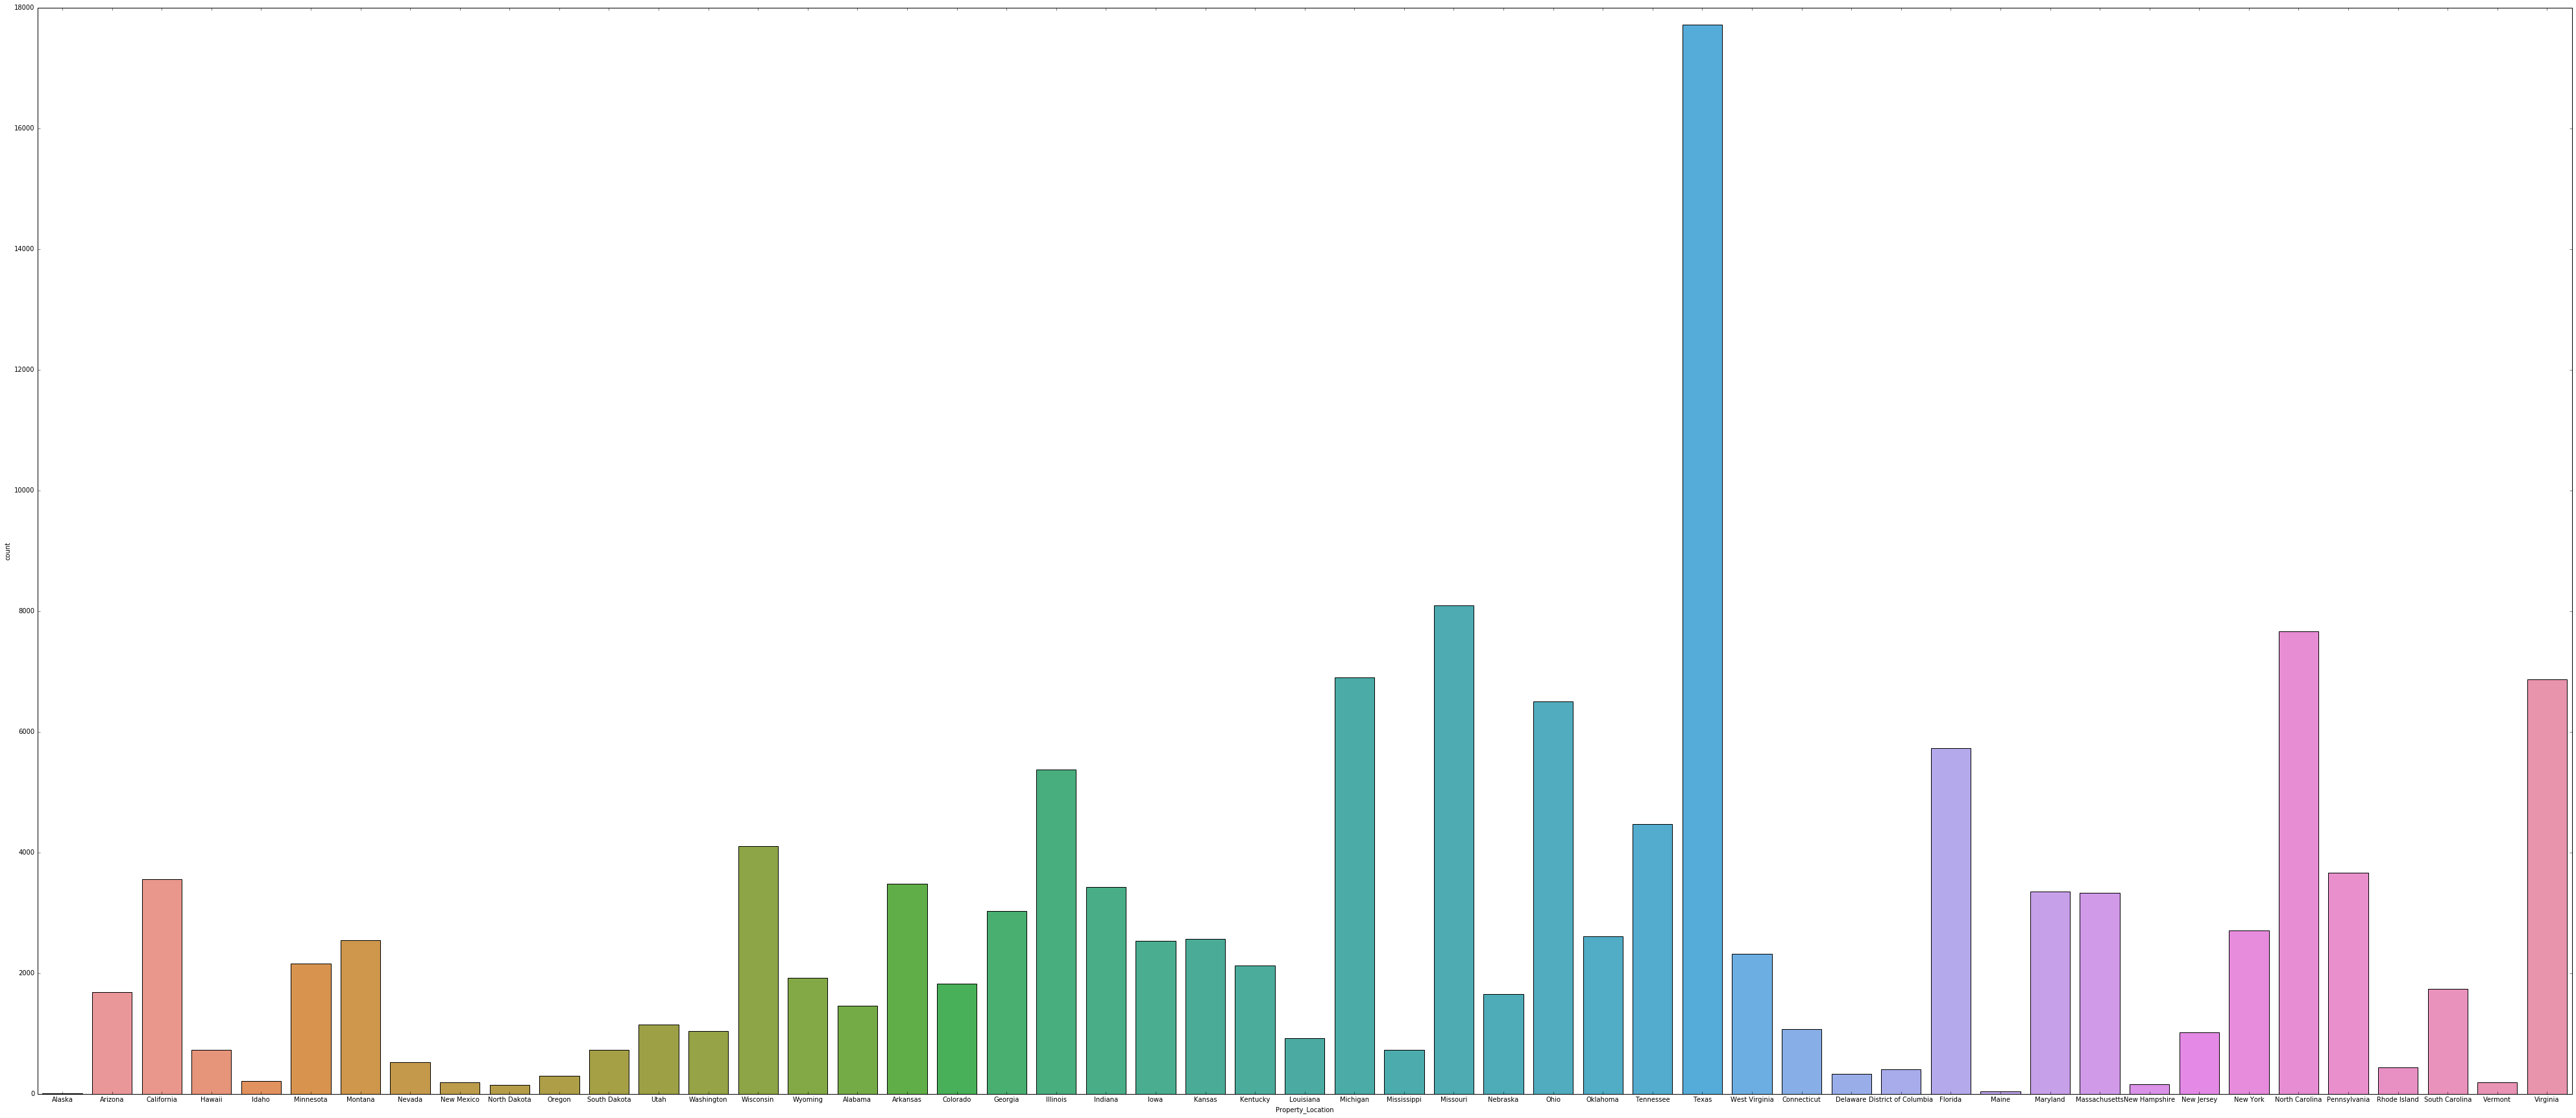

In [380]:
rcParams['figure.figsize']=70,30
pl=sns.countplot(x='Property_Location', data=new_df)
plt.show()